In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = "E:/Data/Monitor Data/data_frames/"

# df_wrist = pd.read_csv(path + "wrist.csv")
# df_hip = pd.read_csv(path + "hip.csv")
df_chest = pd.read_csv(path + "chest.csv")
df_thigh = pd.read_csv(path + "thigh.csv")

In [3]:
# print(len(df_wrist))
# print(len(df_hip))
print(len(df_chest))
print(len(df_thigh))

353708
351276


In [4]:
df_thigh.head()

,Accelerometer X,Accelerometer Y,Accelerometer Z,actual_datetime_x,file,time,id,primary_behavior,primary_posture,primary_upperbody,...,magnitude_of_change_Y,magnitude_of_change_Z,time_diff_seconds,year,month,day_of_week,day,hour,minute,second
0,-0.920621,-0.155646,-0.318593,2017-10-04 01:44:45,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:45,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.000000,0.000000,1,2017,10,2,4,1,44,45
1,-0.928607,-0.150999,-0.310559,2017-10-04 01:44:46,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:46,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.004647,0.008033,1,2017,10,2,4,1,44,46
2,-0.962693,-0.028313,-0.205231,2017-10-04 01:44:47,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:47,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.122686,0.105329,1,2017,10,2,4,1,44,47
3,-0.967954,-0.025304,-0.199450,2017-10-04 01:44:48,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:48,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,0.003008,0.005781,1,2017,10,2,4,1,44,48
4,-0.953352,-0.088372,-0.257887,2017-10-04 01:44:49,AM_01re_DO1_anterior_thigh_left_accel_AGGREGATE,2017-10-04 01:44:49,AM01,"LES- socializing, communicating, leisure time ...",LA- stand,no,...,-0.063068,-0.058437,1,2017,10,2,4,1,44,49


In [5]:
df_thigh["updated_activity"].value_counts()

sit/lie           156658
stand still        93535
mixed-activity     42324
walking            31248
vehicle            12185
running             9212
bicycling           6114
Name: updated_activity, dtype: int64

In [6]:
vars = ["Accelerometer X", "Accelerometer Y", "Accelerometer Z", 
        "magnitude_of_change_X", "magnitude_of_change_Y", "magnitude_of_change_Z", "time_diff_seconds"]
df_thigh[vars].describe()

,Accelerometer X,Accelerometer Y,Accelerometer Z,magnitude_of_change_X,magnitude_of_change_Y,magnitude_of_change_Z,time_diff_seconds
count,351276.000000,351276.000000,351276.000000,351276.000000,351276.000000,351276.000000,3.512760e+05
mean,-0.485504,-0.094795,0.398142,0.000002,0.000001,0.000004,5.583820e+01
std,0.546423,0.238083,0.536333,0.214725,0.074294,0.226602,2.128299e+04
min,-2.279103,-1.400530,-1.997061,-1.846393,-1.599145,-2.573470,-6.345872e+06
25%,-0.977105,-0.177052,-0.064478,-0.003717,-0.006442,-0.005135,1.000000e+00
50%,-0.595547,-0.063249,0.359341,0.000000,0.000000,0.000000,1.000000e+00
75%,-0.009380,0.042253,0.967438,0.003434,0.006446,0.005450,1.000000e+00
max,1.005442,0.929647,1.494896,1.738009,1.804179,2.732259,7.158903e+06


In [7]:
activities = df_thigh["updated_activity"].unique()
means = []
medians = []
sds = []
mins = []
maxs = []
avg_mag_of_changes = []

for activity in activities:
    new_df = pd.DataFrame(columns = ["Mean", "Median", "Standard Deviation", "Min", "Max", "Average Magnitude of Change"])
    temp_df = df_thigh[df_thigh["updated_activity"] == activity]
    print("Activity: " + activity)
    
    accx = temp_df["Accelerometer X"]
    accy = temp_df["Accelerometer Y"]
    accz = temp_df["Accelerometer Z"]
    
    for column_vals in [accx, accy, accz]:
        column_name = column_vals.name
        
        mean = column_vals.mean().round(3)
        median = column_vals.median().round(3)
        sd = column_vals.std().round(3)
        min = column_vals.min().round(3)
        max = column_vals.max().round(3)
        avg_magnitude_of_change = column_vals.diff().abs().mean().round(5)
        
        means.append(mean)
        medians.append(median)
        sds.append(sd)
        mins.append(min)
        maxs.append(max)
        avg_mag_of_changes.append(avg_magnitude_of_change)
        
        new_df.loc[column_name] = [mean, median, sd, min, max, avg_magnitude_of_change]
    
    
    display(new_df)
    print("\n")

Activity: stand still


,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
Accelerometer X,-0.915,-0.968,0.216,-1.453,0.826,0.09461
Accelerometer Y,-0.024,-0.024,0.120,-0.972,0.930,0.03866
Accelerometer Z,-0.106,-0.105,0.267,-1.076,1.085,0.12224




Activity: mixed-activity


,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
Accelerometer X,-0.906,-0.977,0.267,-1.969,0.74,0.16992
Accelerometer Y,-0.040,-0.044,0.114,-1.156,0.89,0.07092
Accelerometer Z,-0.083,-0.047,0.299,-1.022,1.10,0.22438




Activity: sit/lie


,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
Accelerometer X,-0.009,-0.045,0.308,-1.173,1.005,0.01062
Accelerometer Y,-0.138,-0.054,0.317,-0.949,0.926,0.00951
Accelerometer Z,0.891,0.970,0.192,-0.992,1.389,0.00708




Activity: running


,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
Accelerometer X,-1.229,-1.222,0.235,-2.279,-0.082,0.26476
Accelerometer Y,-0.113,-0.150,0.255,-1.401,0.858,0.20603
Accelerometer Z,-0.048,-0.047,0.348,-1.997,1.495,0.37391




Activity: walking


,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
Accelerometer X,-1.011,-1.019,0.143,-1.643,-0.008,0.08787
Accelerometer Y,-0.128,-0.139,0.078,-0.594,0.361,0.04791
Accelerometer Z,-0.019,-0.002,0.164,-0.960,0.969,0.10814




Activity: vehicle


,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
Accelerometer X,0.204,0.173,0.278,-1.181,0.876,0.02688
Accelerometer Y,-0.171,-0.189,0.207,-0.870,0.724,0.02410
Accelerometer Z,0.917,0.968,0.156,-0.235,1.084,0.01607




Activity: bicycling


,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
Accelerometer X,-0.792,-0.791,0.148,-1.291,-0.287,0.12125
Accelerometer Y,-0.118,-0.120,0.054,-0.339,0.289,0.04361
Accelerometer Z,0.596,0.614,0.149,-0.140,1.054,0.09657


In [8]:
accels = ["Accelerometer X", "Accelerometer Y", "Accelerometer Z"]*len(df_thigh["updated_activity"].unique())
activities = []
for act in df_thigh["updated_activity"].unique():
    activities = activities + [act]*3

In [9]:
summary_stats = pd.DataFrame(data = {"Accelerometer": accels,
                     "Activity": activities,
                     "Mean": means,
                     "Median": medians,
                     "Standard Deviation": sds,
                     "Min": mins,
                     "Max": maxs,
                     "Average Magnitude of Change": avg_mag_of_changes
                    })
display(summary_stats)

,Accelerometer,Activity,Mean,Median,Standard Deviation,Min,Max,Average Magnitude of Change
0,Accelerometer X,stand still,-0.915,-0.968,0.216,-1.453,0.826,0.09461
1,Accelerometer Y,stand still,-0.024,-0.024,0.120,-0.972,0.930,0.03866
2,Accelerometer Z,stand still,-0.106,-0.105,0.267,-1.076,1.085,0.12224
3,Accelerometer X,mixed-activity,-0.906,-0.977,0.267,-1.969,0.740,0.16992
4,Accelerometer Y,mixed-activity,-0.040,-0.044,0.114,-1.156,0.890,0.07092
5,Accelerometer Z,mixed-activity,-0.083,-0.047,0.299,-1.022,1.100,0.22438
6,Accelerometer X,sit/lie,-0.009,-0.045,0.308,-1.173,1.005,0.01062
7,Accelerometer Y,sit/lie,-0.138,-0.054,0.317,-0.949,0.926,0.00951
8,Accelerometer Z,sit/lie,0.891,0.970,0.192,-0.992,1.389,0.00708
9,Accelerometer X,running,-1.229,-1.222,0.235,-2.279,-0.082,0.26476


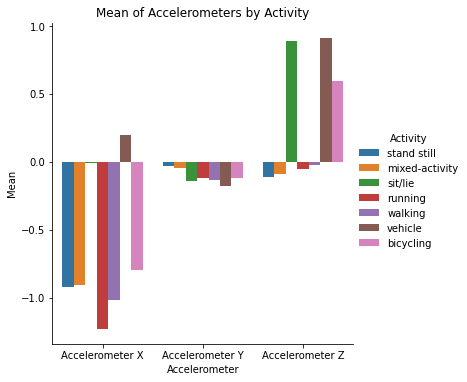

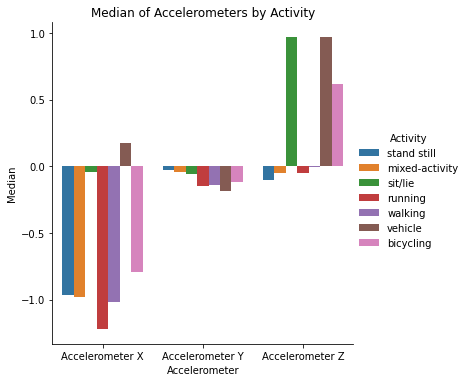

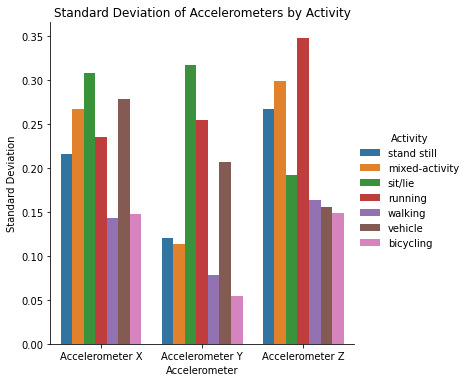

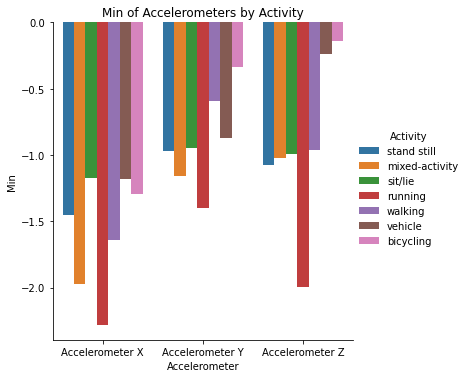

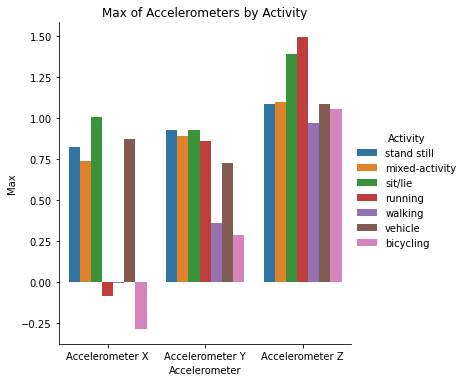

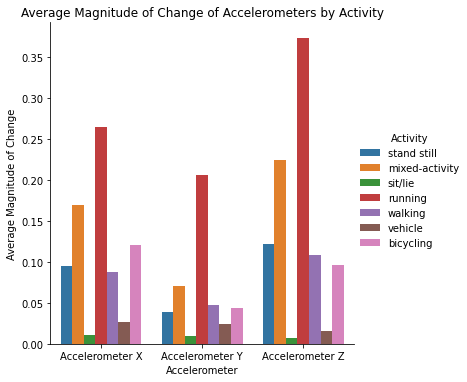

In [10]:
for stat in summary_stats.columns[2:]:
    sns.catplot(data=summary_stats, kind="bar", x="Accelerometer", y=stat, hue="Activity")
    plt.title(stat + " of Accelerometers by Activity");

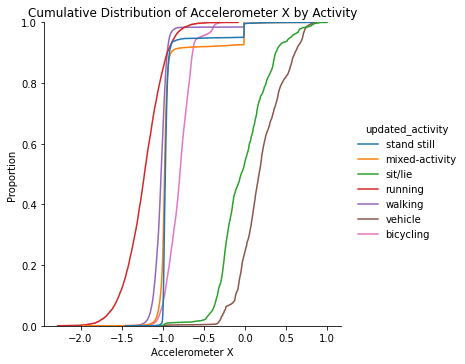

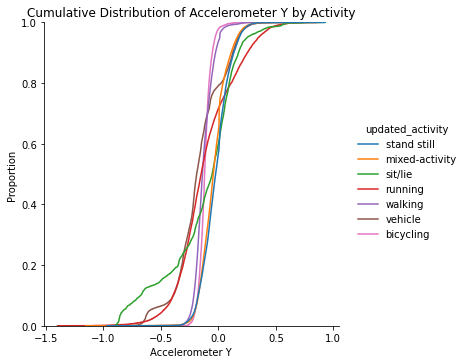

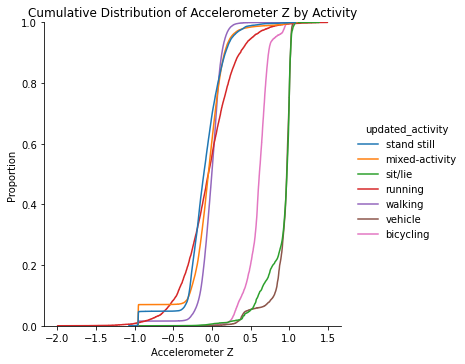

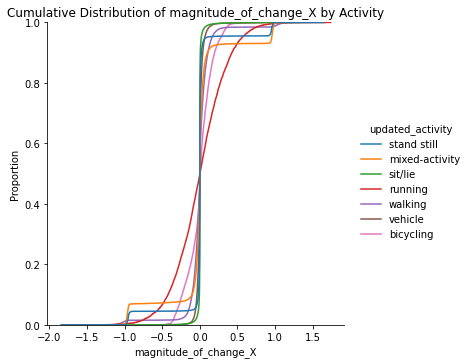

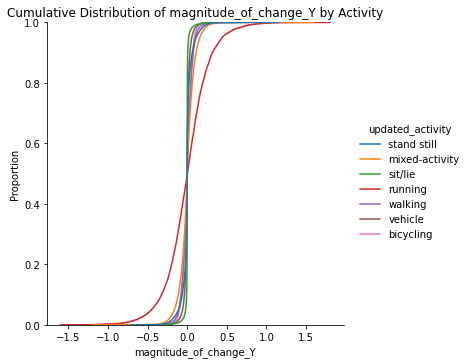

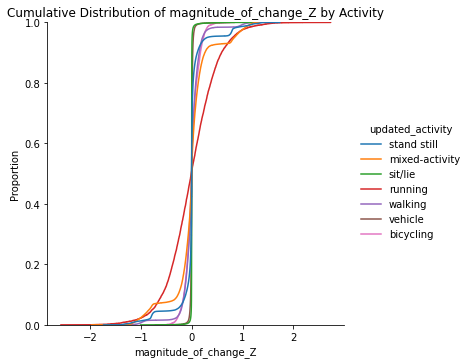

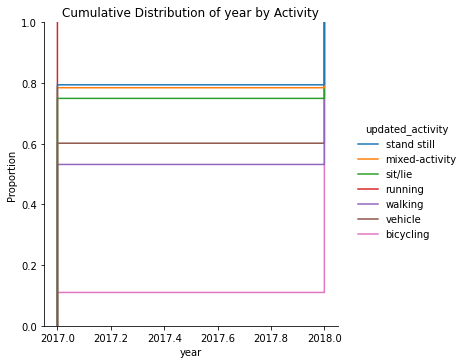

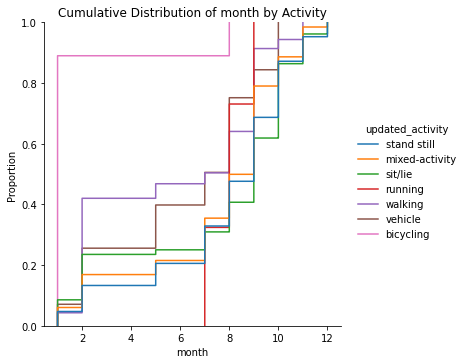

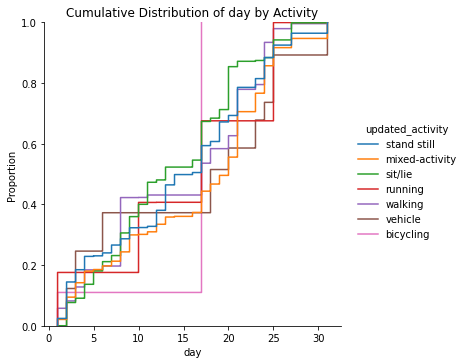

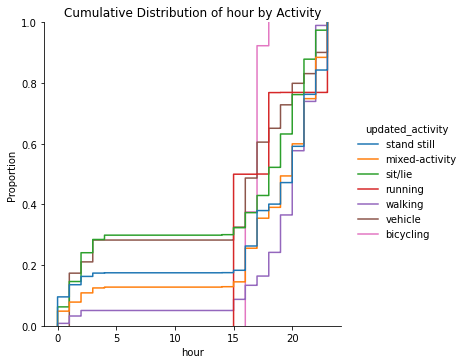

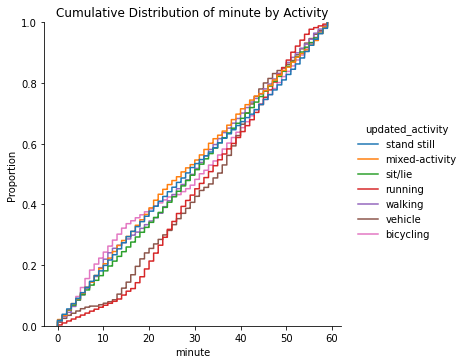

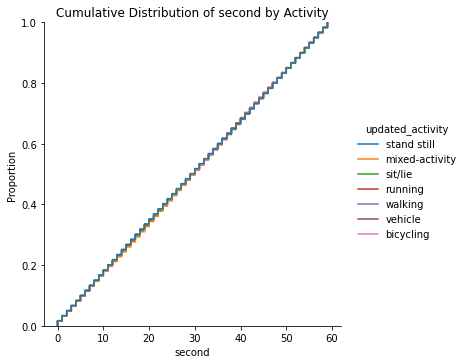

In [11]:
columns = ["Accelerometer X", "Accelerometer Y", "Accelerometer Z", 
           "magnitude_of_change_X", "magnitude_of_change_Y", "magnitude_of_change_Z",
           "year", "month", "day", "hour", "minute", "second"]

for column in columns:
    sns.displot(data = df_thigh, x=column, hue="updated_activity", kind="ecdf") #kind="kde" for density plot, "hist" for histogram
    plt.title("Cumulative Distribution of " + column + " by Activity")

In [12]:
#Probably have the wrong time variable (activities until 4am but none from 5am-3pm)